In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
alucar  = pd.read_csv('./material curso - Time Series/alucar.csv')

In [3]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [4]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [5]:
print(f'Quantidade de dados nulos: {alucar.isna().sum()}')


Quantidade de dados nulos: mes       0
vendas    0
dtype: int64


In [6]:
print(f'Quantidade de dados nulos total: {alucar.isna().sum().sum()}')

Quantidade de dados nulos total: 0


In [7]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [8]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [9]:
print(sns.__version__)

0.12.2


<Axes: xlabel='mes', ylabel='vendas'>

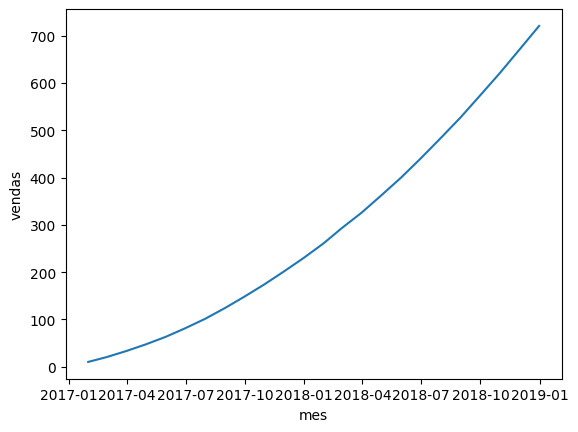

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)

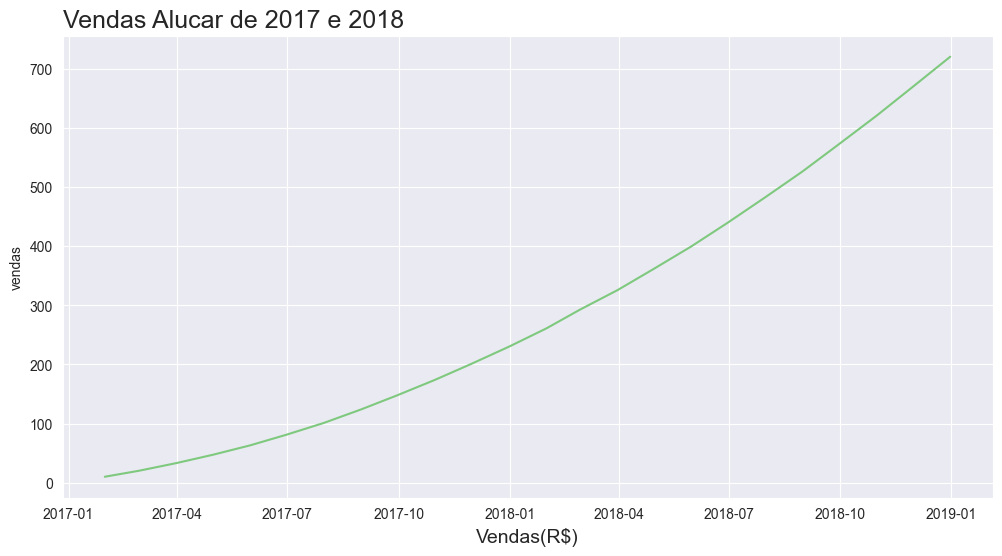

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_xlabel('Vendas(R$)', fontsize=14)
ax = ax

In [12]:
def grafico_vendas (data):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x='mes', y='vendas', data=data)
    ax.figure.set_size_inches(12,6)
    ax.set_title('Vendas Alucar de 2017 e 2018', loc='left',fontsize=18)
    ax.set_xlabel('Tempo', fontsize=14)
    ax.set_xlabel('Vendas(R$)', fontsize=14)
    ax = ax

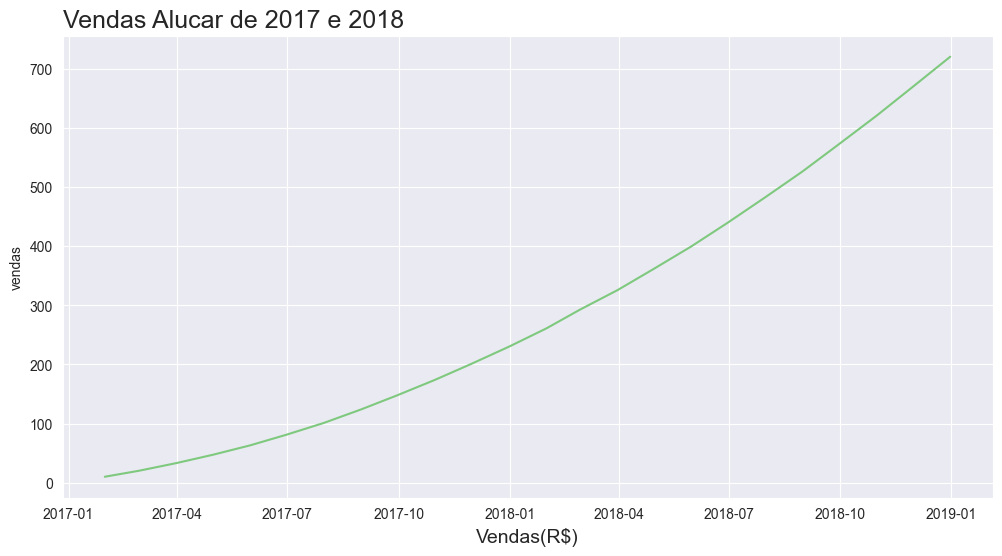

In [13]:
grafico_vendas(alucar)

In [14]:
alucar['aumento'] = alucar['vendas'].diff()

In [15]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


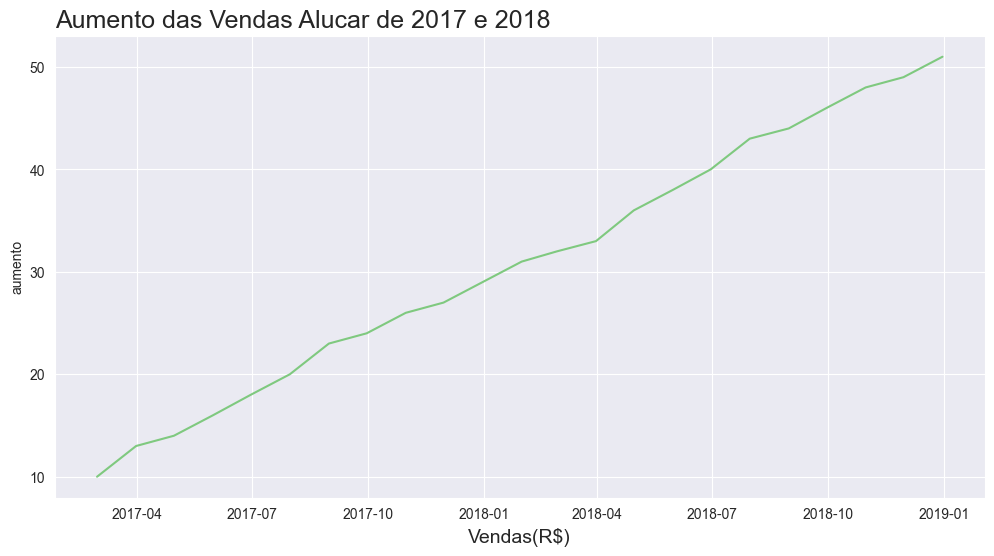

In [16]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das Vendas Alucar de 2017 e 2018', loc='left',fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_xlabel('Vendas(R$)', fontsize=14)
ax = ax

In [17]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left',fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_xlabel(labely, fontsize=14)
    ax = ax

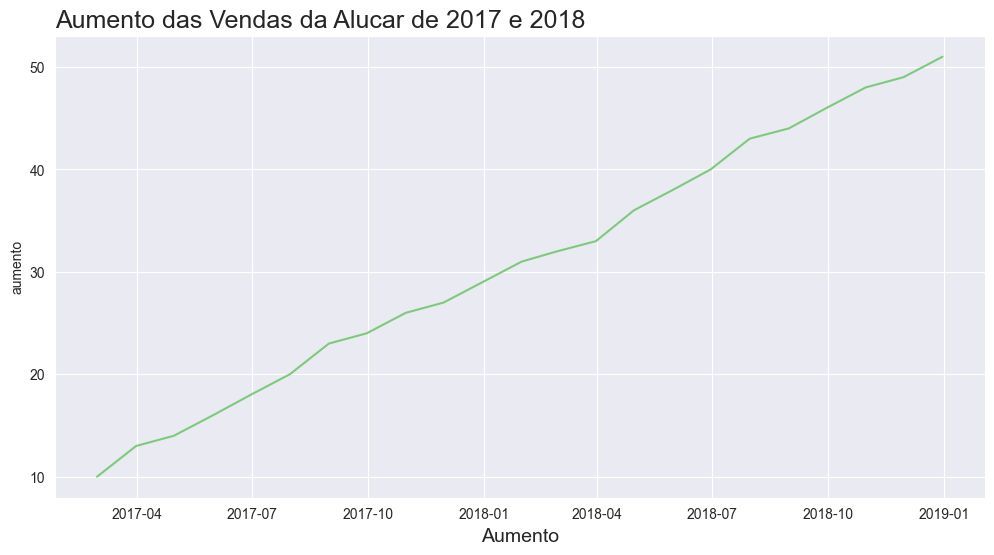

In [18]:
plotar(
    'Aumento das Vendas da Alucar de 2017 e 2018',
    'Tempo',
    'Aumento',
    'mes',
    'aumento',
    alucar
)

In [19]:
alucar['aceleracao'] = alucar['aumento'].diff()

In [20]:
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


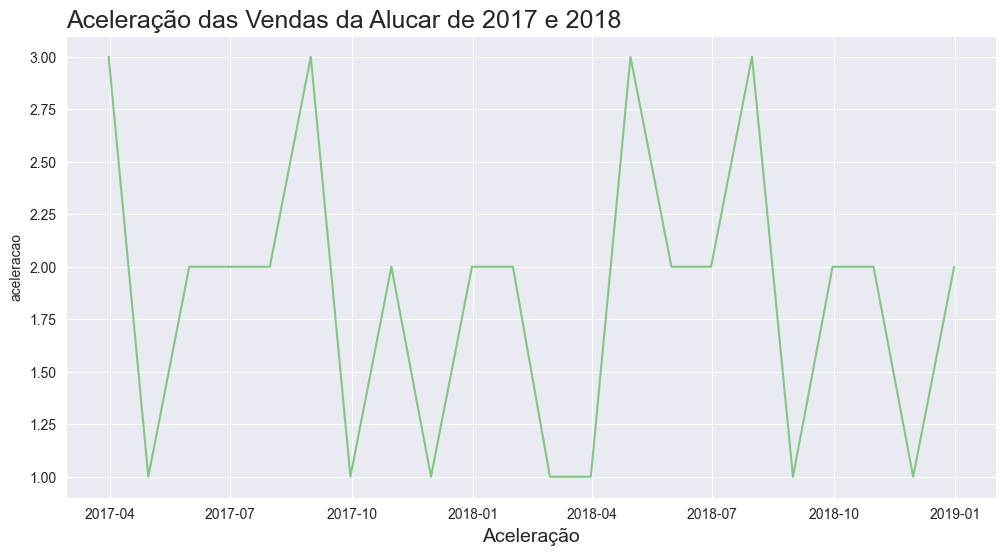

In [21]:
plotar(
    'Aceleração das Vendas da Alucar de 2017 e 2018',
    'Tempo',
    'Aceleração',
    'mes',
    'aceleracao',
    alucar
)

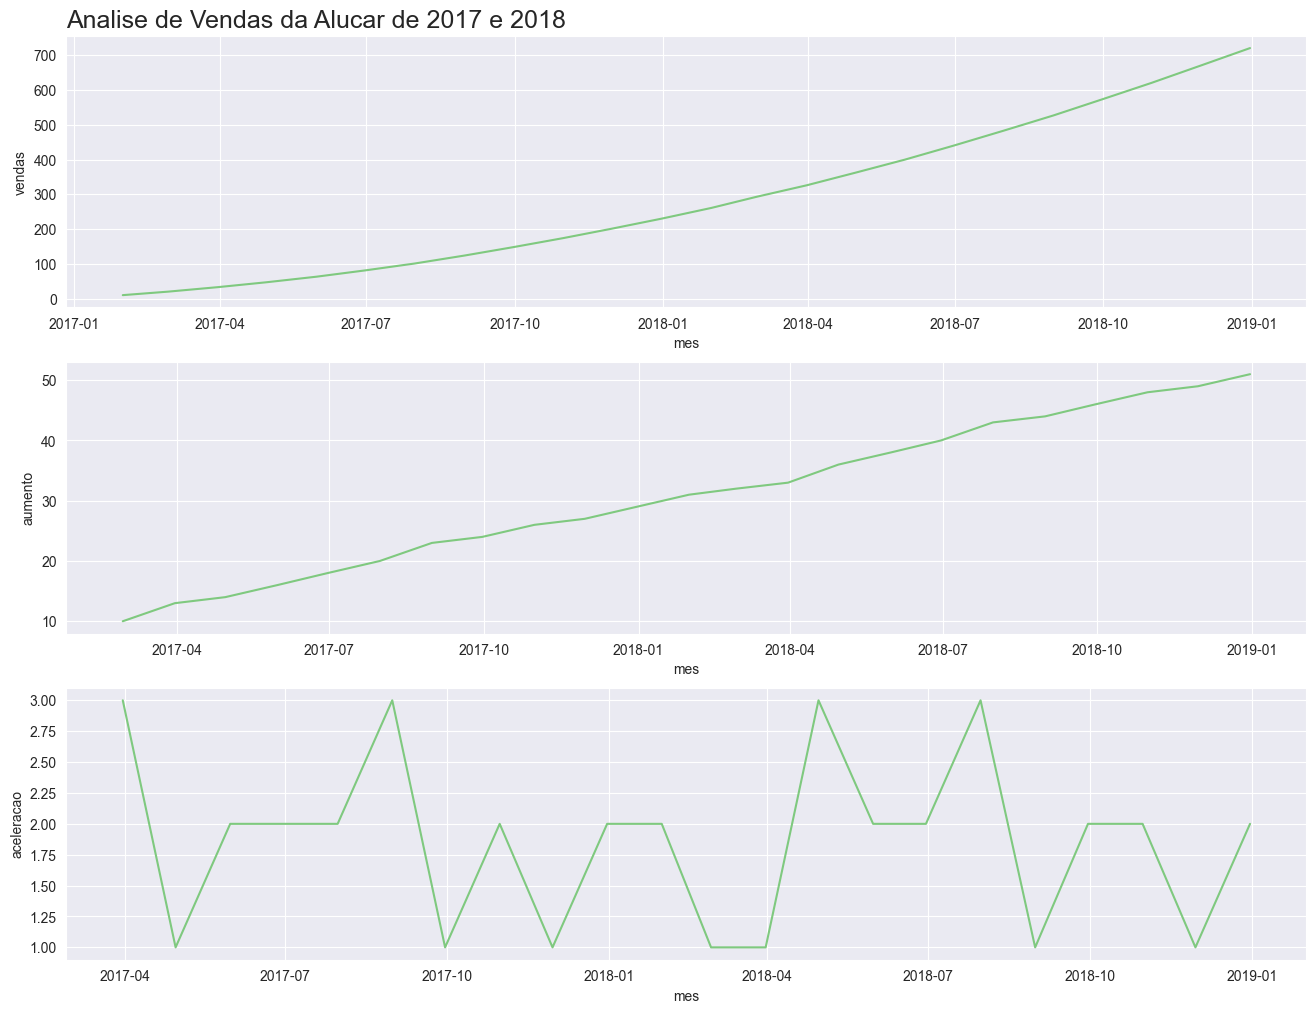

In [22]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de Vendas da Alucar de 2017 e 2018', loc='left',fontsize=18)
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax = plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax = plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [23]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, loc='left',fontsize=18)
    ax = sns.lineplot(x=x, y=y1, data=dataset)
    ax = plt.subplot(3,1,2)
    ax = sns.lineplot(x=x, y=y2, data=dataset)
    ax = plt.subplot(3,1,3)
    ax = sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

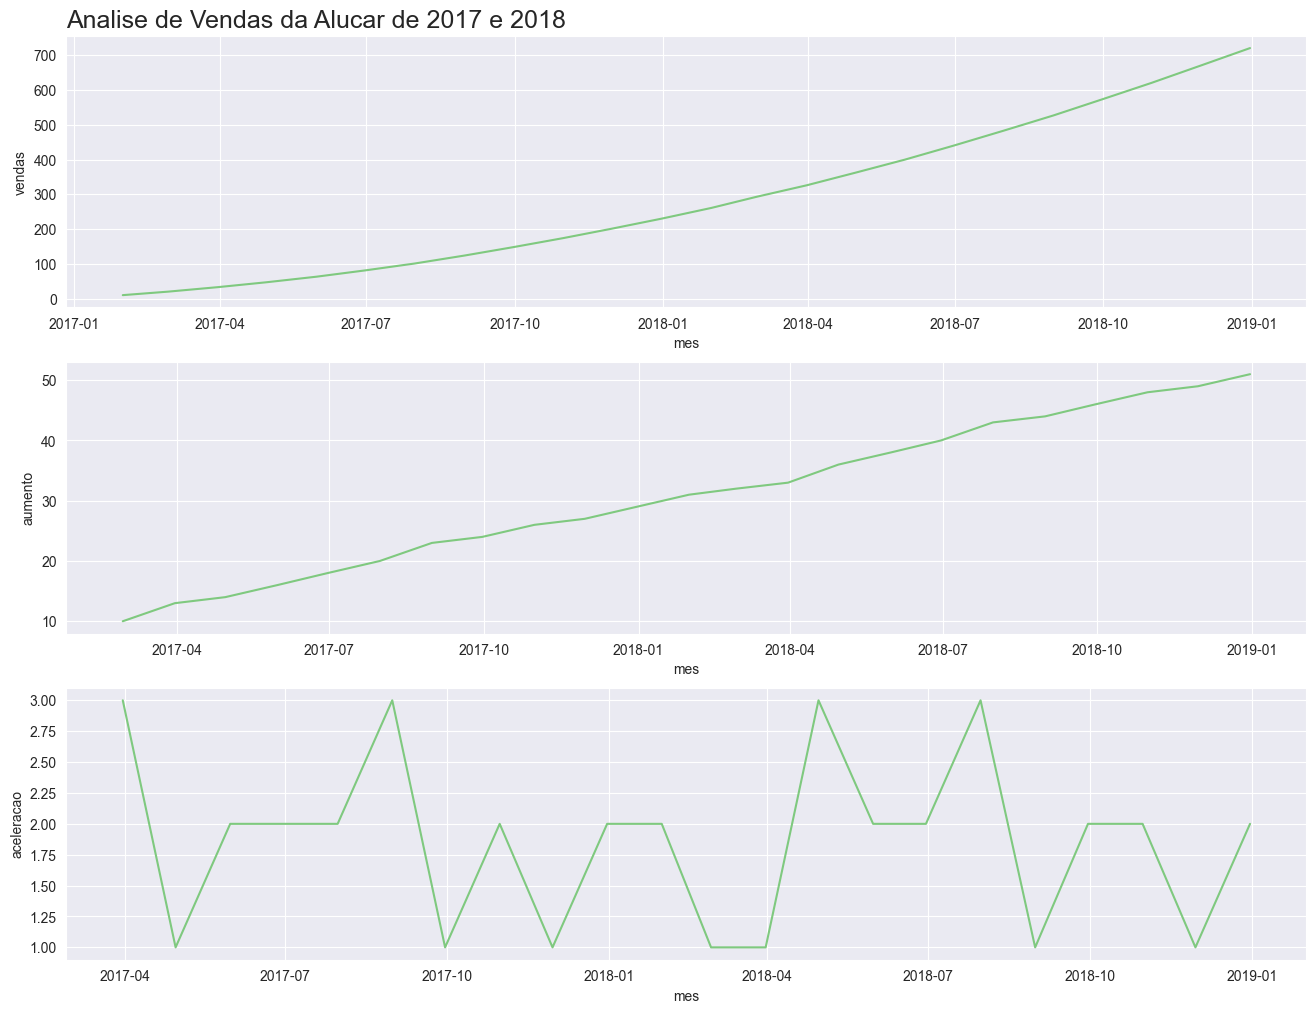

In [24]:
plot_comparacao(
    'mes',
    'vendas',
    'aumento',
    'aceleracao',
    alucar,
    'Analise de Vendas da Alucar de 2017 e 2018'
)

In [25]:
# AUTOCORRELAÇÃO : É UMA MEDIDA DE CORRELAÇÃO ENTRE AS OBSERVAÇÕES DE UMA SÉRIE TEMPORAL. 
# PARA ENTENDER MELHOR O FUNCIONAMENTO DELA COMPARAMOS OS VALORES COM SUAS PROPRIAS CORRELACOES, OU SEJA, CONSIGO MESMAS
# NÍVEL DE CORRELAÇÃO: O MÁXIMO É 1 E O MINIMO É -1.

In [26]:
from pandas.plotting import autocorrelation_plot

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

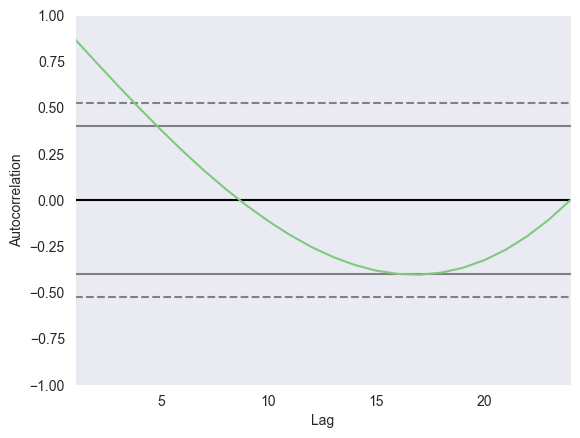

In [27]:
autocorrelation_plot(alucar['vendas'])

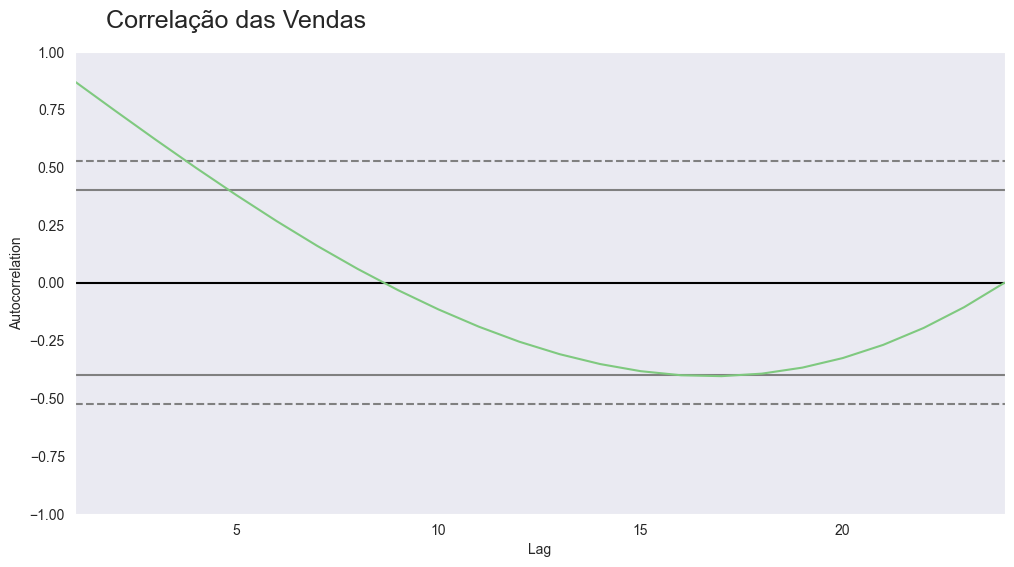

In [28]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

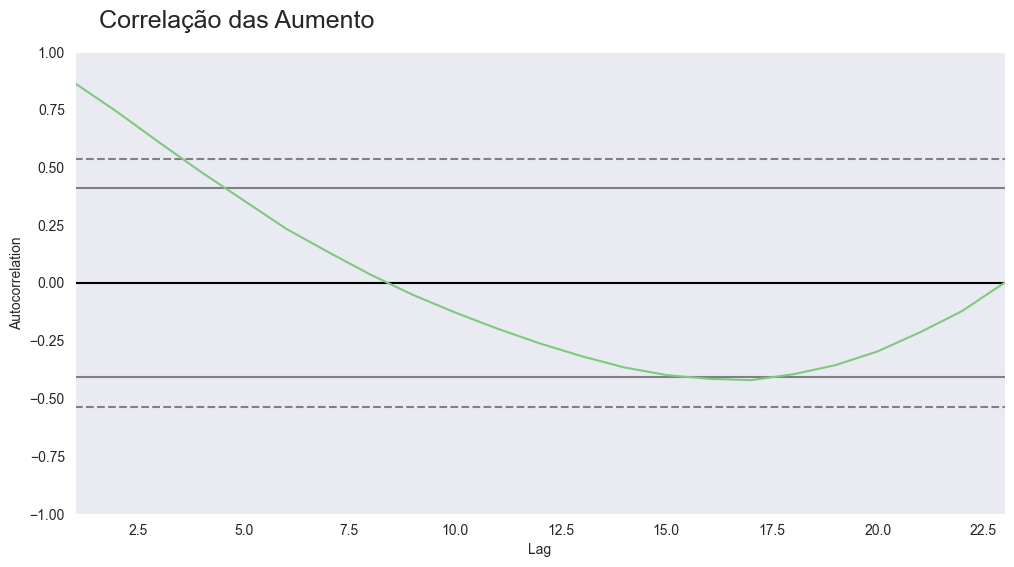

In [29]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aumento', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

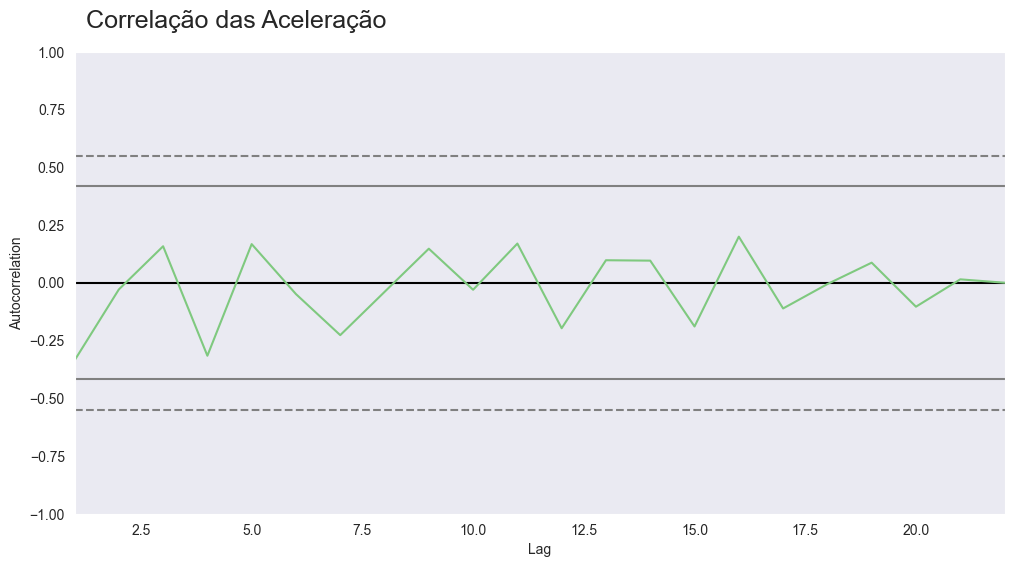

In [30]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aceleração', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [31]:
assinantes = pd.read_csv('./material curso - Time Series/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [32]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [33]:
print(f'Quantidade de linhas e colunas: {assinantes.shape}')
print(f'Quantidade de dados nulos: {assinantes.isna().sum().sum()}')

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [34]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [35]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [36]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


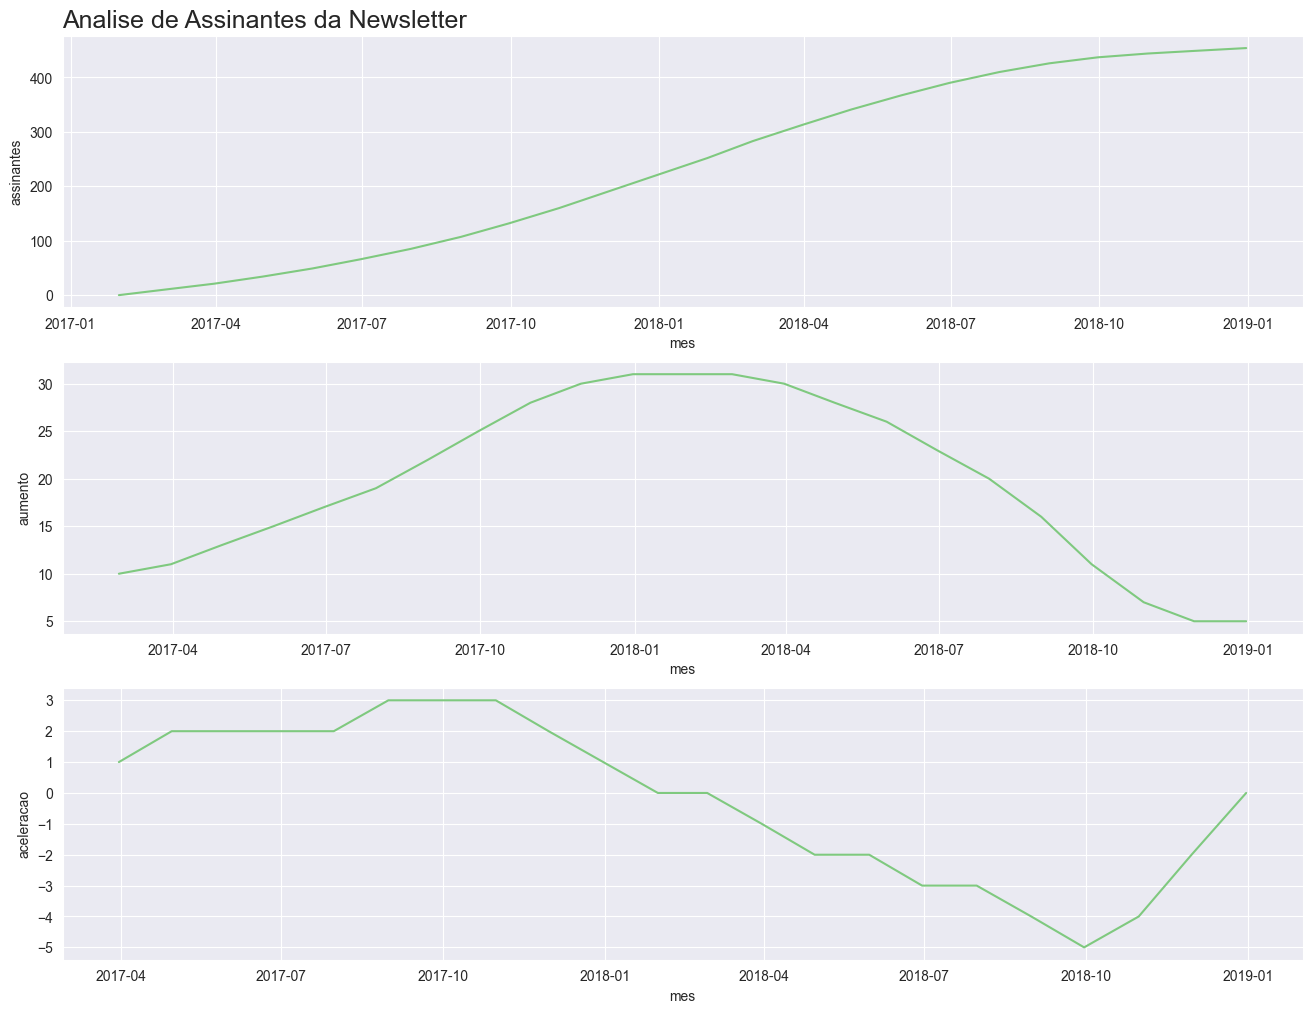

In [37]:
plot_comparacao(
    'mes',
    'assinantes',
    'aumento',
    'aceleracao',
    assinantes,
    'Analise de Assinantes da Newsletter'
)

In [38]:
chocolura = pd.read_csv('./material curso - Time Series/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [39]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [40]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [41]:
print(f'Dados nulos: {chocolura.isna().sum().sum()}')

Dados nulos: 0


In [42]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


Nos Graficos abaixo, podemos observar a sazonalidade, que é um padrão repetitivo dentro de um determinado período fisico.

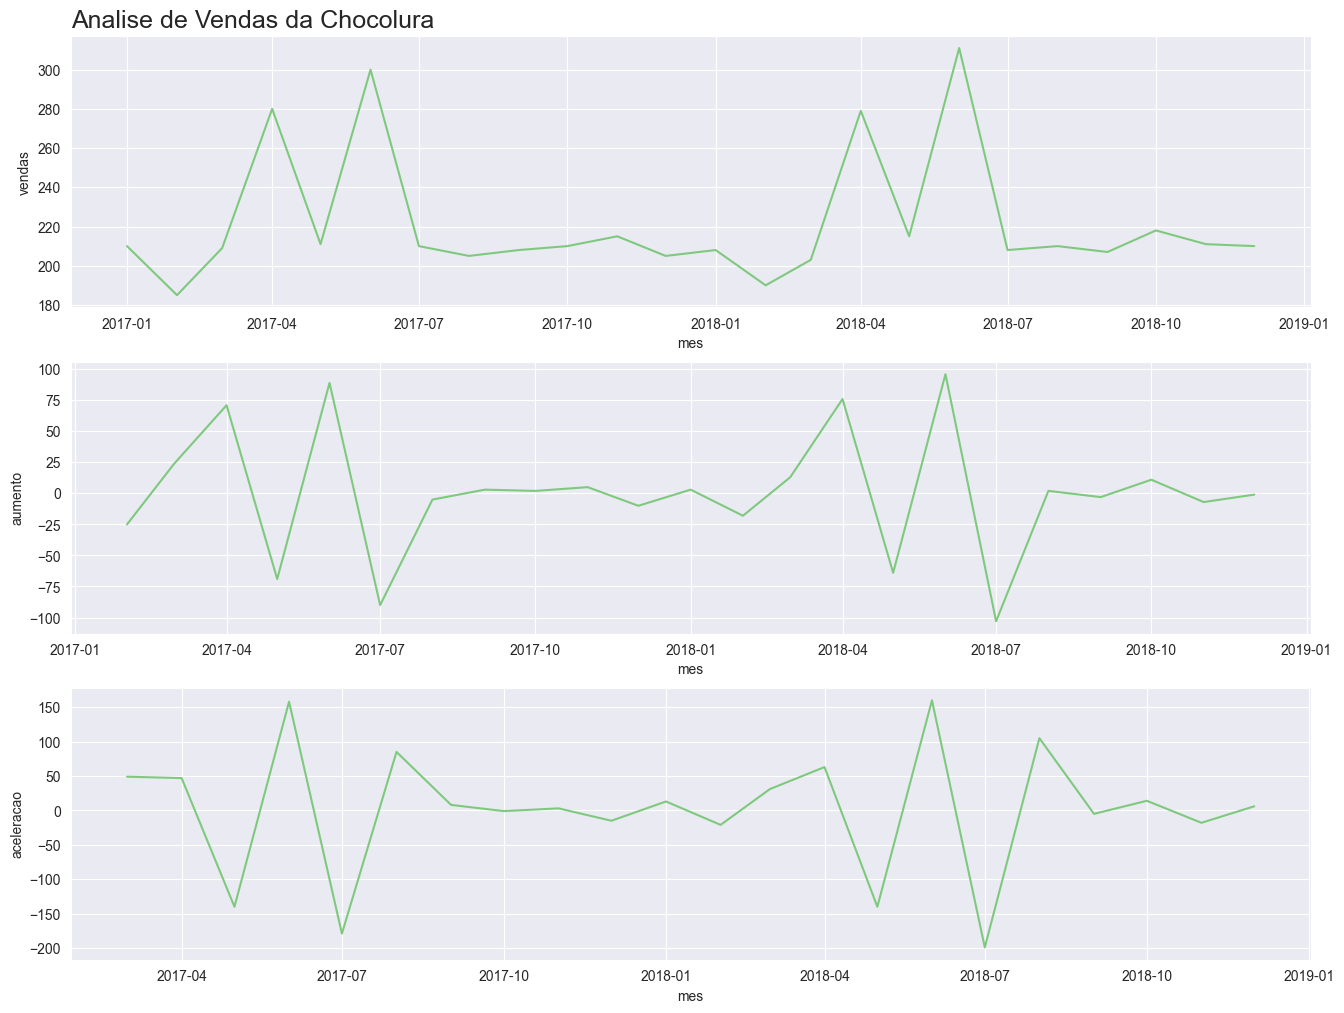

In [43]:
plot_comparacao( 'mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Analise de Vendas da Chocolura')

In [44]:
vendas_por_dia = pd.read_csv('./material curso - Time Series/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [45]:
print(f'Dados nulos: {vendas_por_dia.isna().sum().sum()}')

Dados nulos: 0


In [46]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [47]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


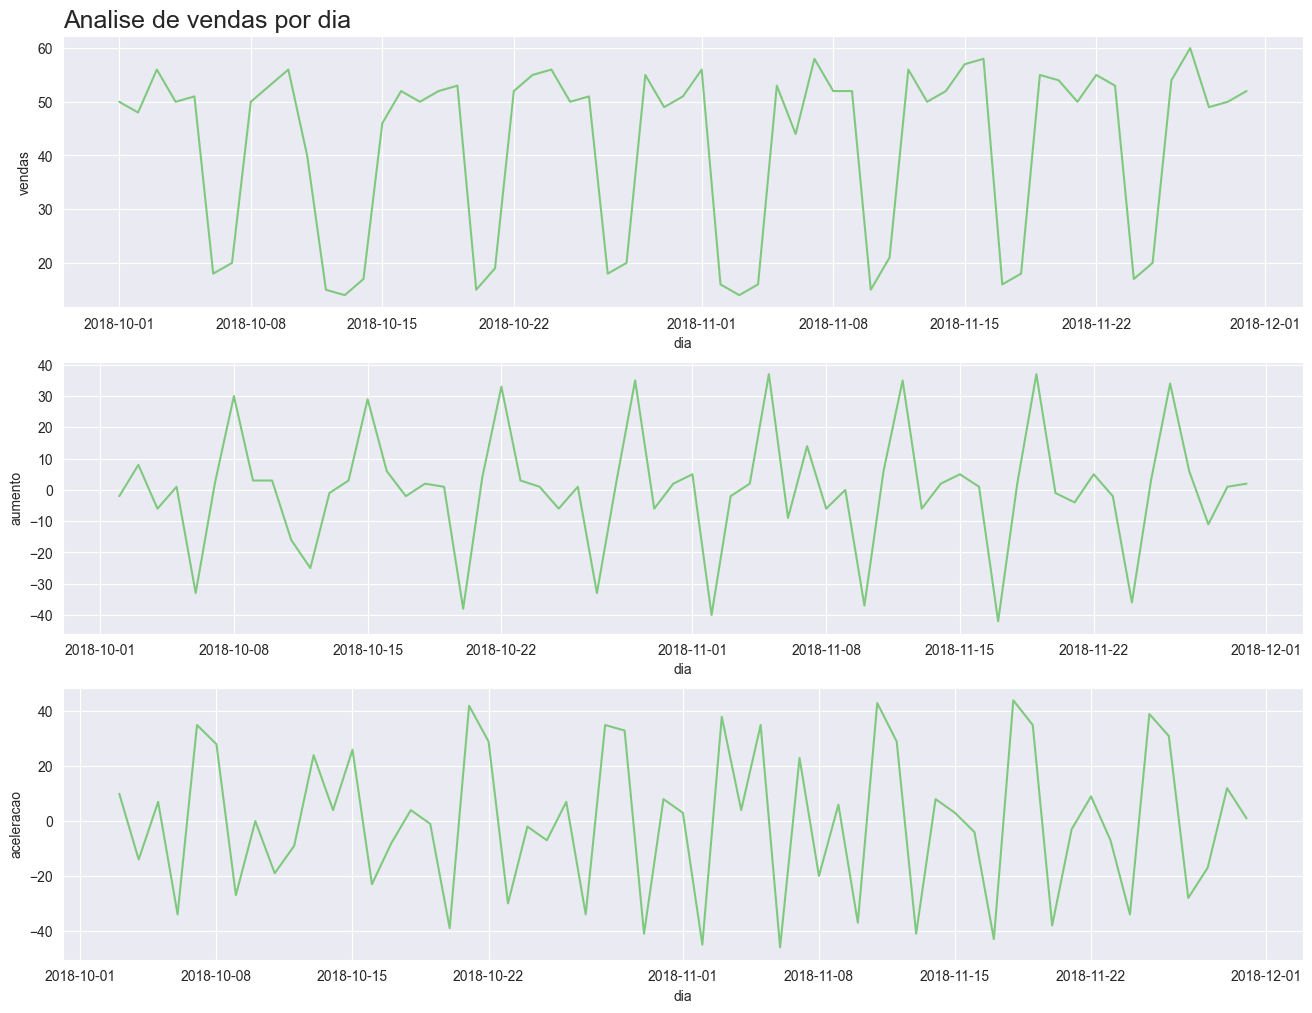

In [48]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Analise de vendas por dia')


In [49]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name(locale='pt_BR.utf8')

In [50]:
vendas_por_dia.head(15)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-feira
1,2018-10-02,48,-2.0,NaN,Terã§a-feira
2,2018-10-03,56,8.0,10.0,Quarta-feira
3,2018-10-04,50,-6.0,-14.0,Quinta-feira
4,2018-10-05,51,1.0,7.0,Sexta-feira
5,2018-10-06,18,-33.0,-34.0,Sã¡bado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda-feira
8,2018-10-09,53,3.0,-27.0,Terã§a-feira
9,2018-10-10,56,3.0,0.0,Quarta-feira


In [51]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()


In [52]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-feira,53.0,1.0,2.0
Quinta-feira,51.0,-2.0,-3.0
Segunda-feira,52.0,34.0,31.0
Sexta-feira,45.0,-7.0,-5.0
Sã¡bado,16.0,-28.0,-20.0
Terã§a-feira,52.0,-1.0,-34.0


CORRELAÇÃO DAS VENDAS DIÁRIAS

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

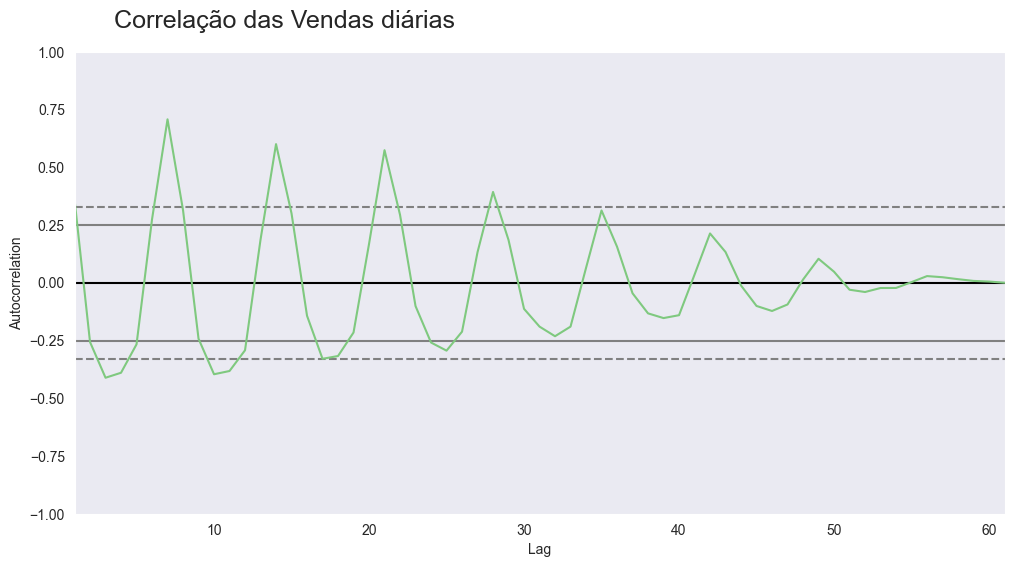

In [53]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas diárias', fontsize=18, x=0.3, y=0.95 )
autocorrelation_plot(vendas_por_dia['vendas'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

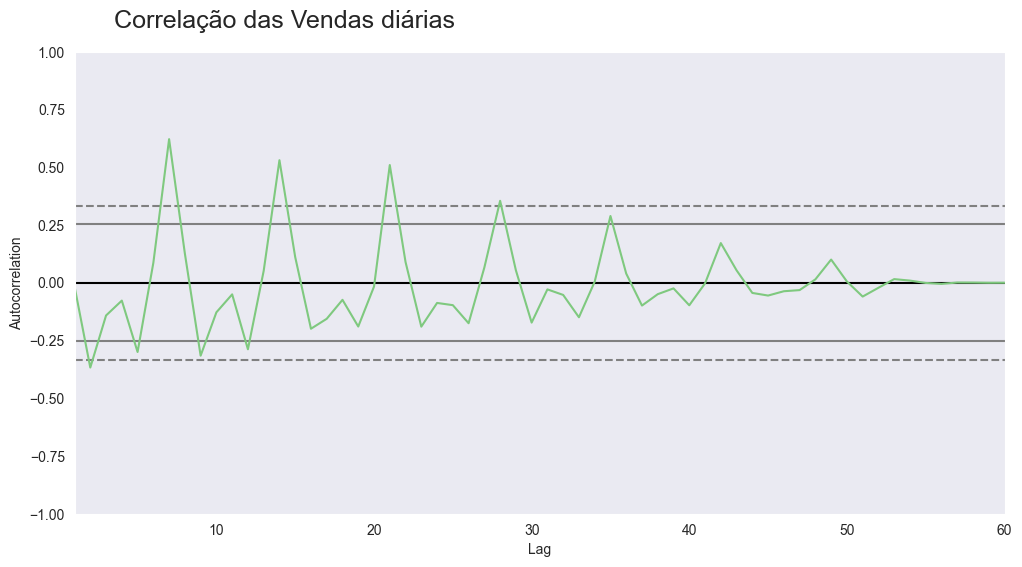

In [54]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas diárias', fontsize=18, x=0.3, y=0.95 )
autocorrelation_plot(vendas_por_dia['aumento'][1:])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

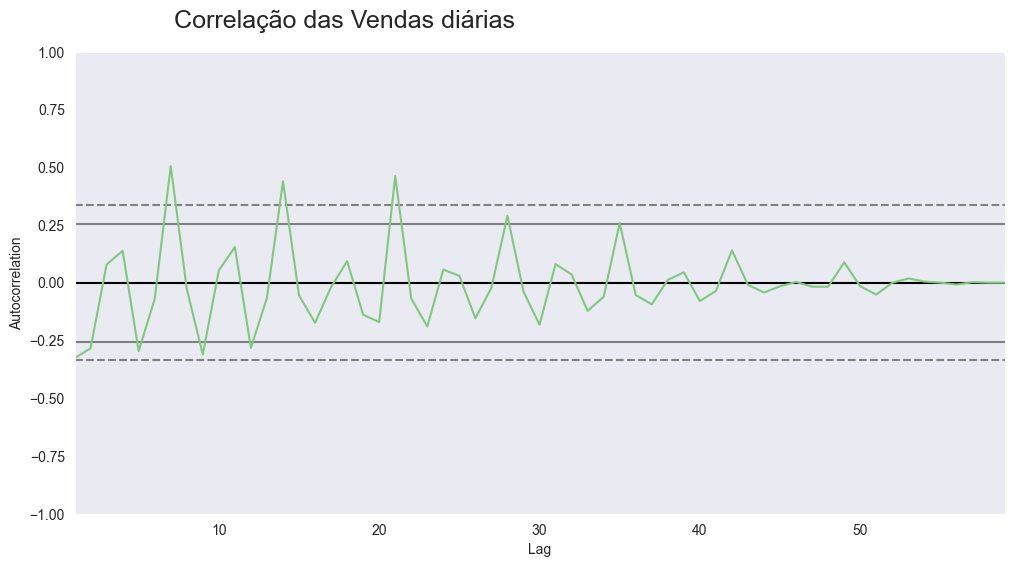

In [55]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas diárias', fontsize=18, x=0.35, y=0.95 )
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])

In [56]:
cafelura = pd.read_csv('./material curso - Time Series/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [57]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [58]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [59]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [60]:
print(f'Quantidade de nulos no dataset: {cafelura.isna().sum().sum()}')

Quantidade de nulos no dataset: 0


In [61]:
cafelura['aumento'] = cafelura['vendas'].diff()
cafelura['aceleracao'] = cafelura['aumento'].diff()

In [62]:
cafelura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


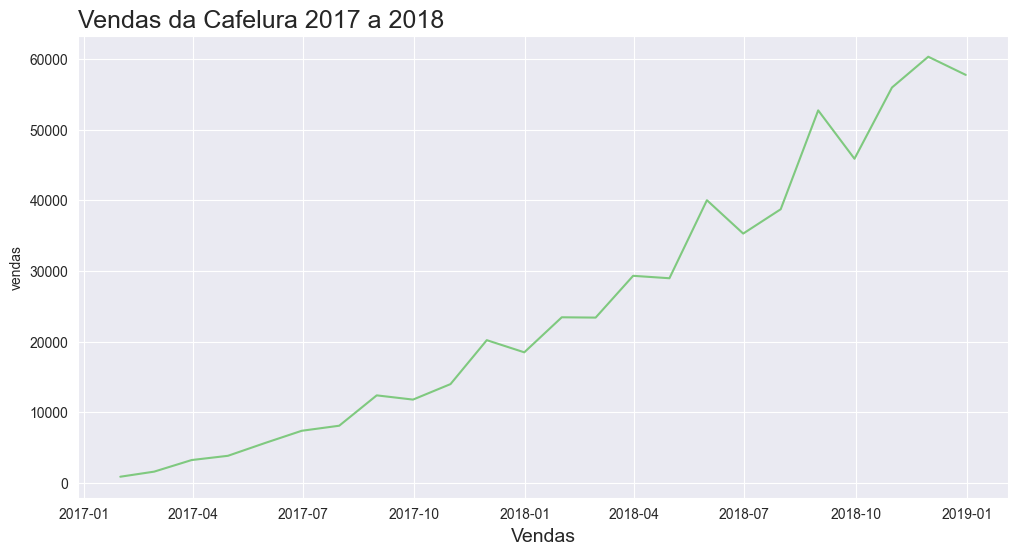

In [63]:
plotar('Vendas da Cafelura 2017 a 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [64]:
quantidade_de_dias_de_fds = pd.read_csv('./material curso - Time Series/dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [65]:
cafelura['vendas_normalizada'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,aumento,aceleracao,vendas_normalizada
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


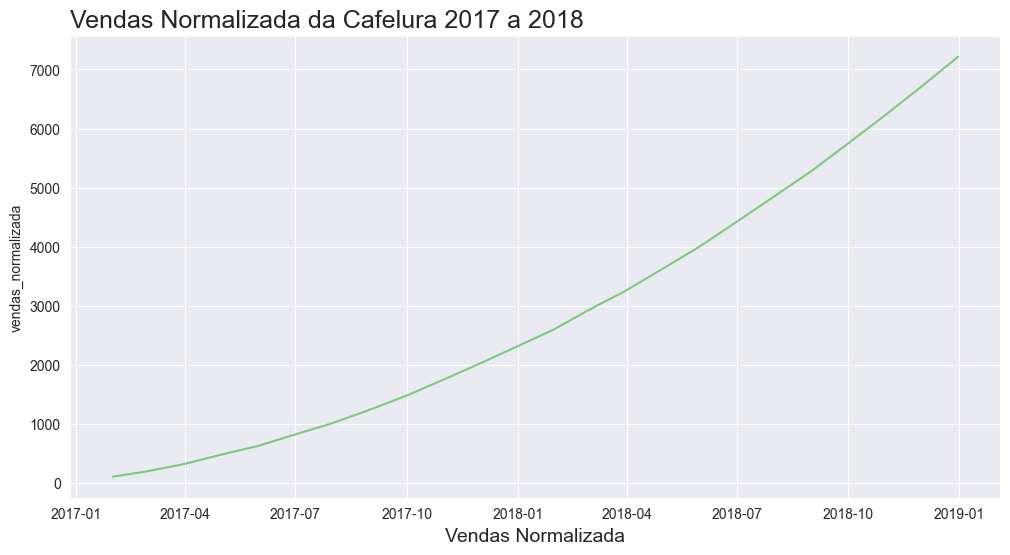

In [66]:
plotar('Vendas Normalizada da Cafelura 2017 a 2018', 'Tempo', 'Vendas Normalizada', 'mes', 'vendas_normalizada', cafelura)

STATSMODEL

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

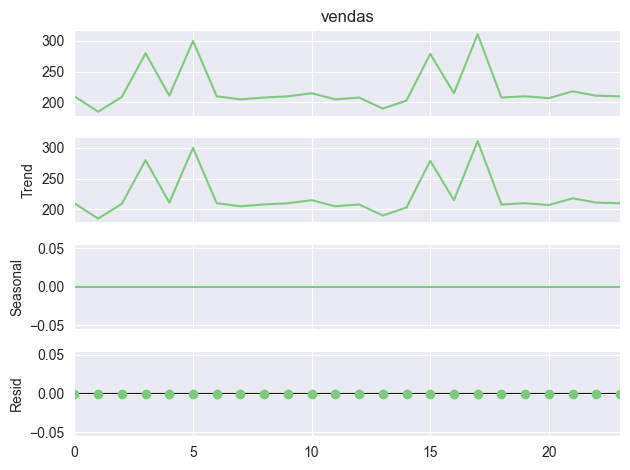

In [69]:
resultado = seasonal_decompose(chocolura['vendas'], period=1) 
ax = resultado.plot()


Alucel - Analise de vendas

In [71]:
alucel = pd.read_csv('./material curso - Time Series/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [72]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [73]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [74]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [75]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

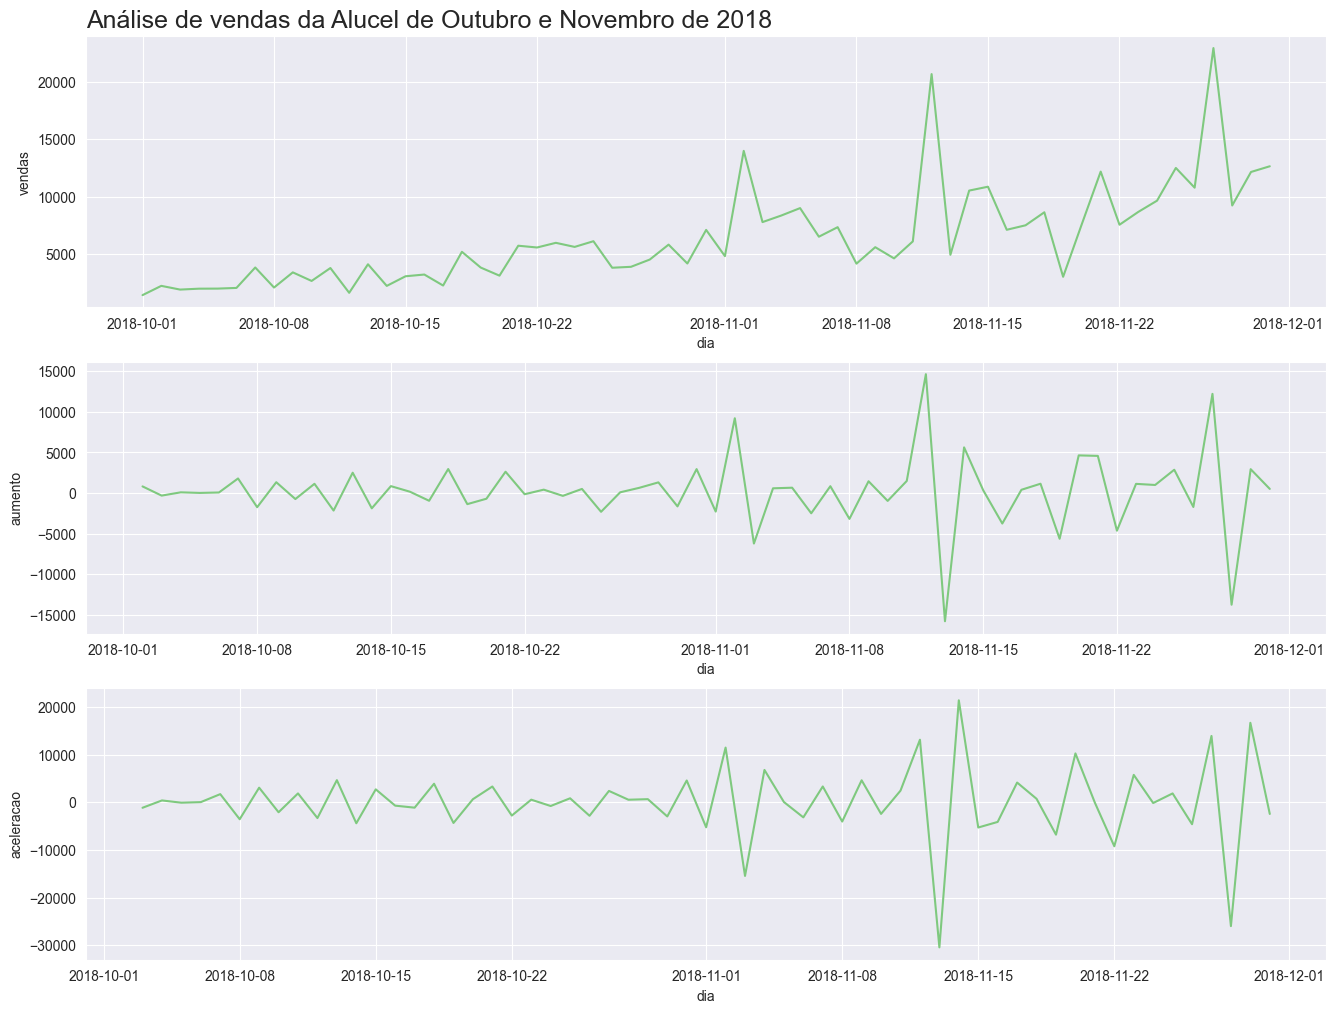

In [76]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')